In [1]:
!pip install wget

In [1]:
import sys
sys.path.append('/Users/siddharthjain/miniconda3/lib/python3.7/site-packages')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
#from collections import OrderedDict
# from google.colab import drive
# os.chdir('/content/gdrive/My Drive')
# drive.mount('/content/gdrive')

In [4]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x
wget.download('https://api.covid19india.org/data.json', os.getcwd()+"//national.json")
wget.download('https://api.covid19india.org/states_daily.json', os.getcwd()+"//states.json")

'/Users/siddharthjain/Desktop/backend/testing-and-cfr//states.json'

In [5]:
dataset=pd.read_csv('./population.csv')

In [6]:
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population

,State,Population
0,Delhi,18710922
1,Haryana,28204692
2,Kerala,35699443
3,Himachal Pradesh,7451955
4,Punjab,30141373
5,Telangana,39362732
6,Goa,1586250
7,Uttarakhand,11250858
8,Chandigarh,1158473
9,Gujarat,63872399


In [7]:
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
def convert(dat): 
    return  str(dat[:2]) + fn(str(dat[3:5]))

In [8]:
dates = np.array([pd.to_datetime(i['date']+"2020") for i in json.load(open('national.json',))['cases_time_series']])
confirmed = np.array([int(i['dailyconfirmed'])for i in json.load(open('national.json',))['cases_time_series']])
deceased = np.array([int(i['dailydeceased'])for i in json.load(open('national.json',))['cases_time_series']])
recovered = np.array([int(i['dailyrecovered'])for i in json.load(open('national.json',))['cases_time_series']])

confirmed = confirmed[dates>=pd.to_datetime("03/04/20")]
deceased = deceased[dates>=pd.to_datetime("03/04/20")]
recovered = recovered[dates>=pd.to_datetime("03/04/20")]
dates = dates[dates>=pd.to_datetime("03/04/20")]

In [9]:
conf = []

for n in range(100):
    print("Iteration: ",n+1,end='\r')
    dataset = np.copy(confirmed)
    mean = 13.0+(20.9-8.7)/4*np.random.normal()
    sd = 12.7+(26.0-6.4)/4*np.random.normal()
    phi = np.sqrt(sd**2 + mean**2)
    mu = np.log(mean**2/phi)
    sigma = np.sqrt(np.log(phi**2/mean**2))
    L = lognorm(s=sigma,scale=np.exp(mu))
    for i in range(len(dataset)-1,-1,-1):
        send_forward = np.round(L.rvs(dataset[i]))
        send_forward = send_forward[i+send_forward<len(dataset)]
        dataset[i] = 0
        for j in np.unique(np.int32(send_forward)):
            dataset[i+j] += np.sum(send_forward==j)
    conf.append(dataset)

In [10]:
CFR = np.cumsum(deceased)/np.cumsum(conf,axis=1)
col_mean = np.nanmean(CFR, axis=0)
inds = np.where(np.isnan(CFR))
CFR[inds] = np.take(col_mean, inds[1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [11]:
temp=dates
dates=[]
for i in range(len(temp)):
  date=[]
  t=(str(temp[i])).split()[0]
  m=t[5:7]
  d=t[-2:]
  #print(m,t)
  date.append(d)
  date.append('/')
  date.append(m)
  date=''.join([str(elem) for elem in date])
  #print(date)
  dates.append(convert(date))

In [12]:
list(100*n2z(np.quantile(CFR,0.025,axis=0)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2976190476190474,
 1.9987995198079231,
 3.5389202762084113,
 3.075100687040986,
 2.5974025974025974,
 3.6342592592592595,
 3.207044673539519,
 3.754636989931108,
 3.1161800486618003,
 2.5543478260869565,
 3.4892798446137756,
 3.6804670734978546,
 3.3260412051395654,
 3.1010246978455074,
 3.9148415866508435,
 3.985880844991015,
 4.168277244944798,
 4.110906259862253,
 5.419923430670096,
 5.230773524869281,
 4.931740111034004,
 5.306668905806837,
 5.2038969813513765,
 4.961990132424238,
 5.022785204571096,
 4.861970636873076,
 5.111313476396792,
 5.047065018791187,
 5.586353686518533,
 5.389205618843674,
 5.565942817174452,
 5.678119832701099,
 5.4954199645686845,
 5.397830391492656,
 5.2297765119457775,
 5.044259565578907,
 5.010026887142678,
 4.936681381145311,
 4.835574643860719,
 4.693496088253409,
 4.713088369539066,
 4.592838835437429,
 4.49793024538611,
 4.501265218069052,
 4.427184857910706,
 4.397578135198252,
 4.387220291888368

In [13]:
json_data = {}
cfr1_point=list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed))),
cfr2_point=list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered)))),
cfr3_point=list(100*n2z(np.median(CFR,axis=0))),
cfr3_l95=list(100*n2z(np.quantile(CFR,0.025,axis=0))),
cfr3_u95=list(100*n2z(np.quantile(CFR,0.975,axis=0))),
cfr3_l50=list(100*n2z(np.quantile(CFR,0.25,axis=0))),
cfr3_u50=list(100*n2z(np.quantile(CFR,0.75,axis=0))),
india = {
         'dates':dates,
         'cfr1_point':list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed))),
         'cfr2_point':list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered)))),
         'cfr3_point':list(100*n2z(np.mean(CFR,axis=0))),
         'cfr3_l95':list(100*n2z(np.quantile(CFR,0.025,axis=0))),
         'cfr3_u95':list(100*n2z(np.quantile(CFR,0.975,axis=0))),
         'cfr3_l50':list(100*n2z(np.quantile(CFR,0.25,axis=0))),
         'cfr3_u50':list(100*n2z(np.quantile(CFR,0.75,axis=0))),
         }
#india = OrderedDict([('dates',dates),('cfr1_point',cfr1_point),('cfr2_point',cfr2_point),('cfr3_point',cfr3_point),('cfr3_l95',cfr3_l95),('cfr3_u95',cfr3_u95),('cfr3_l50',cfr3_l50),('cfr3_u50',cfr3_u50)])
json_data['India'] = india
cfr = pd.DataFrame()
cfr['state']=['India']*len(dates)
cfr['dates']=dates
cfr['cfr1_point']=list(100*n2z(np.cumsum(deceased)/np.cumsum(confirmed)))
cfr['cfr2_point']=list(100*n2z(np.cumsum(deceased)/(np.cumsum(deceased)+np.cumsum(recovered))))
cfr['cfr3_point']=list(100*n2z(np.median(CFR,axis=0)))
cfr['cfr3_l95']=list(100*n2z(np.quantile(CFR,0.025,axis=0)))
cfr['cfr3_u95']=list(100*n2z(np.quantile(CFR,0.975,axis=0)))
cfr['cfr3_l50']=list(100*n2z(np.quantile(CFR,0.25,axis=0)))
cfr['cfr3_u50']=list(100*n2z(np.quantile(CFR,0.75,axis=0)))
cfr

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


,state,dates,cfr1_point,cfr2_point,cfr3_point,cfr3_l95,cfr3_u95,cfr3_l50,cfr3_u50
0,India,04 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,India,05 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,India,06 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,India,07 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,India,08 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,India,09 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,India,10 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,India,11 March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,India,12 March,1.333333,50.000000,7.417582,2.297619,0.000000,4.761905,12.946429
9,India,13 March,1.176471,12.500000,5.555556,1.998800,0.000000,3.571429,10.000000


In [14]:
states = list(filter(lambda v:len(v)<3,list(json.load(open('states.json',))['states_daily'][0].keys())))

In [15]:
dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for st in states:
    data_confirmed[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
    data_deceased[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Deceased',json.load(open('states.json',))['states_daily'])])
    data_recovered[st] = np.array([i[st] for i in filter(lambda v: v['status'] == 'Recovered',json.load(open('states.json',))['states_daily'])])

In [16]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/

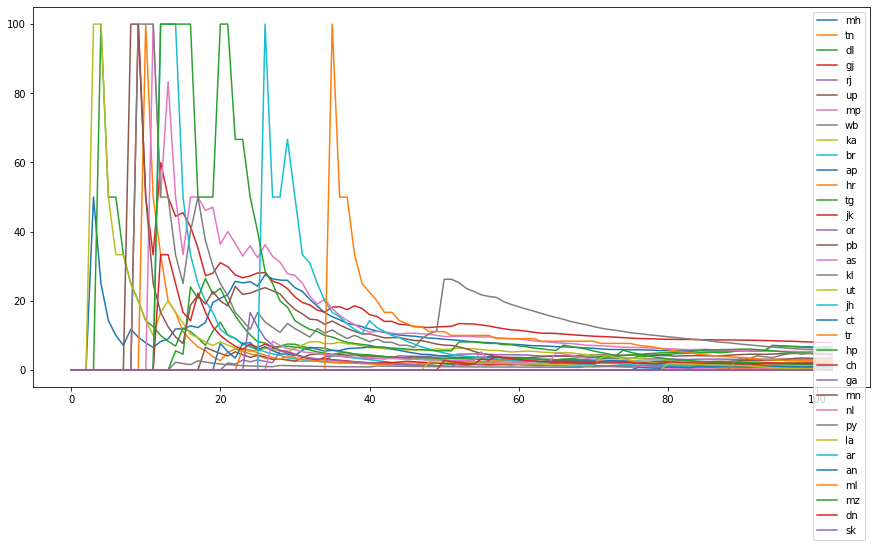

In [17]:
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
state_id = {
  "mh":"Maharashtra",
  "tn":"Tamil Nadu",
  "dl":"Delhi",
  "gj":"Gujarat",
  "rj":"Rajasthan",
  "up":"Uttar Pradesh",
  "mp":"Madhya Pradesh",
  "wb":"West Bengal",
  "ka":"Karnataka",
  "br":"Bihar",
  "ap":"Andhra Pradesh",
  "hr":"Haryana",
  "tg":"Telangana",
  "jk":"Jammu and Kashmir",
  "or":"Odisha",
  "pb":"Punjab",
  "as":"Assam",
  "kl":"Kerala",
  "ut":"Uttarakhand",
  "jh":"Jharkand",
  "ct":"Chhattisgarh",
  "tr":"Tripura",
  "hp":"Himachal Pradesh",
  "ch":"Chandigarh",
  "ga":"Goa",
  "mn":"Manipur",
  "nl":"Nagaland",
  "py":"Puducherry",
  "la":"Ladakh",
  "ar":"Arunachal Pradesh",
  "an":"Andaman and Nicobar Islands",
  "ml":"Meghalaya",
  "mz":"Mizoram",
  "dn":"Dadra and Nagar Haveli and Daman and Diu",
  "sk":"Sikkim",
}

for state in state_id.keys():
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates1=[]
    for i in range(len(temp1)):
      date=temp1[i][3:5]+'/'+temp1[i][0:2]
      dates1.append(convert(date))
    temp = {
        'dates':dates1,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[state]
    #print(a)
    json_data[str(a)] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates1
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [18]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [19]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)